In [1]:
from collections import defaultdict
import itertools

import pandas as pd

from chord_eval.metric import get_distance
from chord_eval.data_types import ChordType
from chord_eval.constants import TRIAD_REDUCTION

# Making the data
## Create all_distances.csv

In [2]:
root1s = []
root2s = []
chord_type1s = []
chord_type2s = []
inversion1s = []
inversion2s = []
spss = []
mechanicals = {
    1: [],
    2: [],
    3: [],
}
tone_by_tones = {
    0: {
        0: [],
        1: [],
        2: [],
    },
    1: {
        0: [],
        1: [],
        2: [],
    },
    2: {
        0: [],
        1: [],
        2: [],
    },
}

for root1 in range(0, 12):
    print(f"Checking distances from root {root1}")
    for root2 in range(root1, 12):
        for chord_type1 in ChordType:
            for chord_type2 in ChordType:
                for inversion1 in range(3 if chord_type1 in TRIAD_REDUCTION.values() else 4):
                    for inversion2 in range(3 if chord_type2 in TRIAD_REDUCTION.values() else 4):
                        sps = get_distance("SPS", root1, root2, chord_type1, chord_type2, inversion1=inversion1, inversion2=inversion2)

                        for bass_weight in [1, 2, 3]:
                            mechanicals[bass_weight].append(
                                get_distance(
                                    "mechanical",
                                    root1,
                                    root2,
                                    chord_type1,
                                    chord_type2,
                                    inversion1=inversion1,
                                    inversion2=inversion2,
                                    bass_weight=bass_weight,
                                )
                            )

                        for root_bonus in [0, 1, 2]:
                            for bass_bonus in [0, 1, 2]:
                                tone_by_tones[root_bonus][bass_bonus].append(
                                    get_distance(
                                        "tone by tone",
                                        root1,
                                        root2,
                                        chord_type1,
                                        chord_type2,
                                        inversion1=inversion1,
                                        inversion2=inversion2,
                                        bass_bonus=bass_bonus,
                                        root_bonus=root_bonus,
                                    )
                                )

                        root1s.append(root1)
                        root2s.append(root2)
                        chord_type1s.append(chord_type1)
                        chord_type2s.append(chord_type2)
                        inversion1s.append(inversion1)
                        inversion2s.append(inversion2)
                        spss.append(sps)

Checking distances from root 0
Checking distances from root 1
Checking distances from root 2
Checking distances from root 3
Checking distances from root 4
Checking distances from root 5
Checking distances from root 6
Checking distances from root 7
Checking distances from root 8
Checking distances from root 9
Checking distances from root 10
Checking distances from root 11


In [9]:
data_dict = {
    "root1": root1s,
    "root2": root2s,
    "chord_type1": chord_type1s,
    "chord_type2": chord_type2s,
    "inversion1": inversion1s,
    "inversion2": inversion2s,
    "sps": spss,
}

for bass_weight in [1, 2, 3]:
    data_dict[f"mechanical_b{bass_weight}"] = mechanicals[bass_weight]

for root_bonus in [0, 1, 2]:
    for bass_bonus in [0, 1, 2]:
        data_dict[f"tone_by_tone_r{root_bonus}_b{bass_bonus}"] = tone_by_tones[root_bonus][bass_bonus]

data = pd.DataFrame(data_dict)
data.to_csv("all_distances.csv", index=False)

## Load all_distances.csv

In [2]:
data = pd.read_csv("all_distances.csv")

for chord_type in ChordType:
    for i in ["1", "2"]:
        data.loc[data[f"chord_type{i}"] == str(chord_type), [f"chord_type{i}"]] = chord_type

In [3]:
data

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,mechanical_b1,mechanical_b2,mechanical_b3,tone_by_tone_r0_b0,tone_by_tone_r0_b1,tone_by_tone_r0_b2,tone_by_tone_r1_b0,tone_by_tone_r1_b1,tone_by_tone_r1_b2,tone_by_tone_r2_b0,tone_by_tone_r2_b1,tone_by_tone_r2_b2
0,0,0,ChordType.MAJOR,ChordType.MAJOR,0,0,0.000000,0,0,0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0,0,ChordType.MAJOR,ChordType.MAJOR,0,1,0.180520,4,8,12,0.0,0.25,0.400000,0.0,0.200000,0.333333,0.0,0.166667,0.285714
2,0,0,ChordType.MAJOR,ChordType.MAJOR,0,2,0.040469,5,10,15,0.0,0.25,0.400000,0.0,0.200000,0.333333,0.0,0.166667,0.285714
3,0,0,ChordType.MAJOR,ChordType.MAJOR,1,0,0.180520,4,8,12,0.0,0.25,0.400000,0.0,0.200000,0.333333,0.0,0.166667,0.285714
4,0,0,ChordType.MAJOR,ChordType.MAJOR,1,1,0.000000,0,0,0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151003,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,2,3,0.024775,3,6,9,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000
151004,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,0,0.088996,1,2,3,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000
151005,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,1,0.103985,5,10,15,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000
151006,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,2,0.024775,3,6,9,0.0,0.20,0.333333,0.0,0.166667,0.285714,0.0,0.142857,0.250000


# Plotting

([<matplotlib.axis.YTick at 0x7fce70d01610>,
 [Text(0, 0, 'B'),
  Text(0, 1, 'Bb'),
  Text(0, 2, 'A'),
  Text(0, 3, 'Ab'),
  Text(0, 4, 'G'),
  Text(0, 5, 'Gb'),
  Text(0, 6, 'F'),
  Text(0, 7, 'E'),
  Text(0, 8, 'Eb'),
  Text(0, 9, 'D'),
  Text(0, 10, 'Db'),
  Text(0, 11, 'C')])

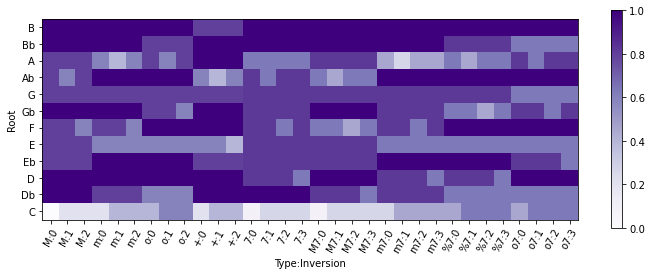

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

more_types = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED, ChordType.MAJ_MIN7, ChordType.MAJ_MAJ7, ChordType.MIN_MIN7, ChordType.HALF_DIM7, ChordType.DIM7]
more_types_labels = ["M", "m", "o", "+", "7", "M7", "m7", "%7", "o7"]
triads = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED]
triads_labels = ["M", "m", "o", "+"]

TYPES = more_types
TYPE_LABELS = more_types_labels

c_maj_mask = (data["root1"] == 0) & (data["chord_type1"] == ChordType.MAJOR) & (data["inversion1"] == 0)
c_maj_data = data.loc[c_maj_mask]

metric = "tone_by_tone_r1_b1"

xlabels = []
for chord_type, type_label in zip(TYPES, TYPE_LABELS):
    max_inv = 3 if chord_type in triads else 4
    for inv in range(max_inv):
        xlabels.append(f"{type_label}:{inv}")

matrix = np.zeros((12, len(xlabels)))

for root in range(12):
    i = 0
    for chord_type in TYPES:
        max_inv = 3 if chord_type in triads else 4
        for inv in range(max_inv):
            matrix[(11 - root), i] = c_maj_data.loc[(c_maj_data["root2"] == root) & (c_maj_data["chord_type2"] == chord_type) & (c_maj_data["inversion2"] == inv), metric]
            i += 1

plt.figure(figsize=(12,4)) 
plt.imshow(matrix, cmap="Purples")
plt.colorbar()
plt.xlabel("Type:Inversion")
plt.ylabel("Root")
plt.xticks(ticks=range(len(xlabels)), labels=xlabels, rotation=60)
plt.yticks(ticks=range(12), labels=["B", "Bb", "A", "Ab", "G", "Gb", "F", "E", "Eb", "D", "Db", "C"])

([<matplotlib.axis.YTick at 0x7fce703a4eb0>,
 [Text(0, 0, 'B'),
  Text(0, 1, 'Bb'),
  Text(0, 2, 'A'),
  Text(0, 3, 'Ab'),
  Text(0, 4, 'G'),
  Text(0, 5, 'Gb'),
  Text(0, 6, 'F'),
  Text(0, 7, 'E'),
  Text(0, 8, 'Eb'),
  Text(0, 9, 'D'),
  Text(0, 10, 'Db'),
  Text(0, 11, 'C')])

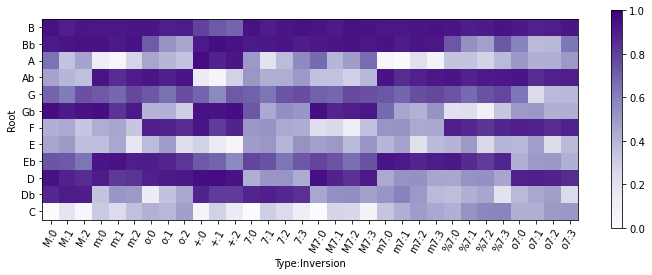

In [5]:
import matplotlib.pyplot as plt
import numpy as np

more_types = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED, ChordType.MAJ_MIN7, ChordType.MAJ_MAJ7, ChordType.MIN_MIN7, ChordType.HALF_DIM7, ChordType.DIM7]
more_types_labels = ["M", "m", "o", "+", "7", "M7", "m7", "%7", "o7"]
triads = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED]
triads_labels = ["M", "m", "o", "+"]

TYPES = more_types
TYPE_LABELS = more_types_labels

c_maj_mask = (data["root1"] == 0) & (data["chord_type1"] == ChordType.MAJOR) & (data["inversion1"] == 0)
c_maj_data = data.loc[c_maj_mask]

metric = "sps"

xlabels = []
for chord_type, type_label in zip(TYPES, TYPE_LABELS):
    max_inv = 3 if chord_type in triads else 4
    for inv in range(max_inv):
        xlabels.append(f"{type_label}:{inv}")

matrix = np.zeros((12, len(xlabels)))

for root in range(12):
    i = 0
    for chord_type in TYPES:
        max_inv = 3 if chord_type in triads else 4
        for inv in range(max_inv):
            matrix[(11 - root), i] = c_maj_data.loc[(c_maj_data["root2"] == root) & (c_maj_data["chord_type2"] == chord_type) & (c_maj_data["inversion2"] == inv), metric]
            i += 1

plt.figure(figsize=(12,4)) 
plt.imshow(matrix, cmap="Purples", vmin=0, vmax=1)
plt.colorbar()
plt.xlabel("Type:Inversion")
plt.ylabel("Root")
plt.xticks(ticks=range(len(xlabels)), labels=xlabels, rotation=60)
plt.yticks(ticks=range(12), labels=["B", "Bb", "A", "Ab", "G", "Gb", "F", "E", "Eb", "D", "Db", "C"])

([<matplotlib.axis.YTick at 0x7fce702c6eb0>,
 [Text(0, 0, 'B'),
  Text(0, 1, 'Bb'),
  Text(0, 2, 'A'),
  Text(0, 3, 'Ab'),
  Text(0, 4, 'G'),
  Text(0, 5, 'Gb'),
  Text(0, 6, 'F'),
  Text(0, 7, 'E'),
  Text(0, 8, 'Eb'),
  Text(0, 9, 'D'),
  Text(0, 10, 'Db'),
  Text(0, 11, 'C')])

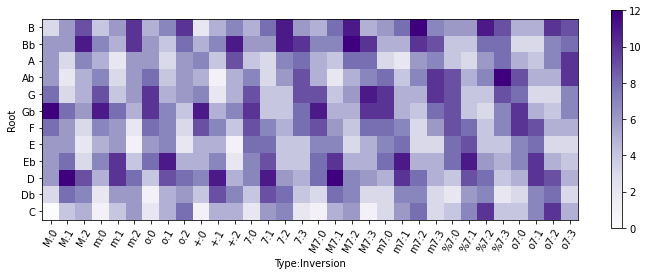

In [6]:
more_types = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED, ChordType.MAJ_MIN7, ChordType.MAJ_MAJ7, ChordType.MIN_MIN7, ChordType.HALF_DIM7, ChordType.DIM7]
more_types_labels = ["M", "m", "o", "+", "7", "M7", "m7", "%7", "o7"]
triads = [ChordType.MAJOR, ChordType.MINOR, ChordType.DIMINISHED, ChordType.AUGMENTED]
triads_labels = ["M", "m", "o", "+"]

TYPES = more_types
TYPE_LABELS = more_types_labels

c_maj_mask = (data["root1"] == 0) & (data["chord_type1"] == ChordType.MAJOR) & (data["inversion1"] == 0)
c_maj_data = data.loc[c_maj_mask]

metric = "mechanical_b1"

xlabels = []
for chord_type, type_label in zip(TYPES, TYPE_LABELS):
    max_inv = 3 if chord_type in triads else 4
    for inv in range(max_inv):
        xlabels.append(f"{type_label}:{inv}")

matrix = np.zeros((12, len(xlabels)))

for root in range(12):
    i = 0
    for chord_type in TYPES:
        max_inv = 3 if chord_type in triads else 4
        for inv in range(max_inv):
            matrix[(11 - root), i] = c_maj_data.loc[(c_maj_data["root2"] == root) & (c_maj_data["chord_type2"] == chord_type) & (c_maj_data["inversion2"] == inv), metric]
            i += 1

plt.figure(figsize=(12,4)) 
plt.imshow(matrix, cmap="Purples")
plt.colorbar()
plt.xlabel("Type:Inversion")
plt.ylabel("Root")
plt.xticks(ticks=range(len(xlabels)), labels=xlabels, rotation=60)
plt.yticks(ticks=range(12), labels=["B", "Bb", "A", "Ab", "G", "Gb", "F", "E", "Eb", "D", "Db", "C"])

# Metric Normalization

In [7]:
metric_names = ["sps"]

for bass_weight in [1, 2, 3]:
    metric_names.append(f"mechanical_b{bass_weight}")

for root_bonus in [0, 1, 2]:
    for bass_bonus in [0, 1, 2]:
        metric_names.append(f"tone_by_tone_r{root_bonus}_b{bass_bonus}")

means = {metric: data[metric].mean() for metric in metric_names}
stds = {metric: data[metric].std() for metric in metric_names}

for metric in metric_names:
    data[f"{metric}_norm"] = (data[metric] - means[metric]) / stds[metric]

In [8]:
common_chord_types = [
    ChordType.MAJOR,
    ChordType.MINOR,
    ChordType.MAJ_MIN7,
    ChordType.DIMINISHED,
    ChordType.DIM7,
    ChordType.MIN_MIN7,
]

small_data = data.loc[data["chord_type1"].isin(common_chord_types) & data["chord_type2"].isin(common_chord_types)]

In [9]:
means

{'sps': 0.5721972574238494,
 'mechanical_b1': 6.374807957194321,
 'mechanical_b2': 9.367497086247086,
 'mechanical_b3': 12.360186215299851,
 'tone_by_tone_r0_b0': 0.6698188175460339,
 'tone_by_tone_r0_b1': 0.7214558169106697,
 'tone_by_tone_r0_b2': 0.7547679593130326,
 'tone_by_tone_r1_b0': 0.707553242212655,
 'tone_by_tone_r1_b1': 0.7433275058271421,
 'tone_by_tone_r1_b2': 0.7683623194986704,
 'tone_by_tone_r2_b0': 0.7318870523411859,
 'tone_by_tone_r2_b1': 0.7586390881844431,
 'tone_by_tone_r2_b2': 0.7784232812639786}

In [10]:
stds

{'sps': 0.24544982937625243,
 'mechanical_b1': 2.527987065888612,
 'mechanical_b2': 4.092866907810206,
 'mechanical_b3': 5.786831190688099,
 'tone_by_tone_r0_b0': 0.2569781599504201,
 'tone_by_tone_r0_b1': 0.22460163456958446,
 'tone_by_tone_r0_b2': 0.21402574199184762,
 'tone_by_tone_r1_b0': 0.24248019234216658,
 'tone_by_tone_r1_b1': 0.21696156802459182,
 'tone_by_tone_r1_b2': 0.2069520063579233,
 'tone_by_tone_r2_b0': 0.2452949246875706,
 'tone_by_tone_r2_b1': 0.2216262657170972,
 'tone_by_tone_r2_b2': 0.21010620242901681}

In [11]:
data

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,mechanical_b1,mechanical_b2,mechanical_b3,...,mechanical_b3_norm,tone_by_tone_r0_b0_norm,tone_by_tone_r0_b1_norm,tone_by_tone_r0_b2_norm,tone_by_tone_r1_b0_norm,tone_by_tone_r1_b1_norm,tone_by_tone_r1_b2_norm,tone_by_tone_r2_b0_norm,tone_by_tone_r2_b1_norm,tone_by_tone_r2_b2_norm
0,0,0,ChordType.MAJOR,ChordType.MAJOR,0,0,0.000000,0,0,0,...,-2.135916,-2.60652,-3.212157,-3.526529,-2.917984,-3.426079,-3.712756,-2.983702,-3.423056,-3.704904
1,0,0,ChordType.MAJOR,ChordType.MAJOR,0,1,0.180520,4,8,12,...,-0.062242,-2.60652,-2.099076,-1.657595,-2.917984,-2.504257,-2.102077,-2.983702,-2.671039,-2.345047
2,0,0,ChordType.MAJOR,ChordType.MAJOR,0,2,0.040469,5,10,15,...,0.456176,-2.60652,-2.099076,-1.657595,-2.917984,-2.504257,-2.102077,-2.983702,-2.671039,-2.345047
3,0,0,ChordType.MAJOR,ChordType.MAJOR,1,0,0.180520,4,8,12,...,-0.062242,-2.60652,-2.099076,-1.657595,-2.917984,-2.504257,-2.102077,-2.983702,-2.671039,-2.345047
4,0,0,ChordType.MAJOR,ChordType.MAJOR,1,1,0.000000,0,0,0,...,-2.135916,-2.60652,-3.212157,-3.526529,-2.917984,-3.426079,-3.712756,-2.983702,-3.423056,-3.704904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151003,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,2,3,0.024775,3,6,9,...,-0.580661,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029
151004,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,0,0.088996,1,2,3,...,-1.617498,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029
151005,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,1,0.103985,5,10,15,...,0.456176,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029
151006,11,11,ChordType.AUG_MAJ7,ChordType.AUG_MAJ7,3,2,0.024775,3,6,9,...,-0.580661,-2.60652,-2.321692,-1.969084,-2.917984,-2.657894,-2.332174,-2.983702,-2.778470,-2.515029


In [12]:
sorted = defaultdict(dict)
sorted_small = defaultdict(dict)

for metric1, metric2 in itertools.product(metric_names, metric_names):
    sorted_small[metric1][metric2] = (
        small_data[f"{metric1}_norm"] - small_data[f"{metric2}_norm"]
    ).abs().sort_values(ascending=False)

    sorted[metric1][metric2] = (
        data[f"{metric1}_norm"] - data[f"{metric2}_norm"]
    ).abs().sort_values(ascending=False)

# SPS and Tone by Tone

In [13]:
small_data.loc[
    sorted_small["sps"]["tone_by_tone_r1_b1"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] > data["tone_by_tone_r1_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r1_b1", "tone_by_tone_r1_b1_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r1_b1,tone_by_tone_r1_b1_norm,mechanical_b1,mechanical_b1_norm
9,0,0,ChordType.MAJOR,ChordType.MINOR,0,0,0.320111,-1.027036,0.200000,-2.504257,1,-2.126122
132,0,0,ChordType.MINOR,ChordType.MAJOR,0,0,0.320111,-1.027036,0.200000,-2.504257,1,-2.126122
72,0,0,ChordType.MAJOR,ChordType.MIN_MIN7,0,0,0.339475,-0.948148,0.266667,-2.196983,3,-1.334978
1056,0,0,ChordType.MIN_MIN7,ChordType.MAJOR,0,0,0.339475,-0.948148,0.266667,-2.196983,3,-1.334978
180,0,0,ChordType.MINOR,ChordType.MAJ_MIN7,0,0,0.337645,-0.955603,0.266667,-2.196983,3,-1.334978
716,0,0,ChordType.MAJ_MIN7,ChordType.MINOR,0,0,0.337645,-0.955603,0.266667,-2.196983,3,-1.334978
54,0,0,ChordType.MAJOR,ChordType.MAJ_MIN7,1,2,0.325226,-1.006198,0.266667,-2.196983,5,-0.543835
711,0,0,ChordType.MAJ_MIN7,ChordType.MAJOR,2,1,0.325226,-1.006198,0.266667,-2.196983,5,-0.543835
1078,0,0,ChordType.MIN_MIN7,ChordType.MINOR,3,1,0.317819,-1.036378,0.266667,-2.196983,5,-0.543835
211,0,0,ChordType.MINOR,ChordType.MIN_MIN7,1,3,0.317819,-1.036378,0.266667,-2.196983,5,-0.543835


In [14]:
small_data.loc[
    sorted_small["sps"]["tone_by_tone_r1_b1"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] < data["tone_by_tone_r1_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r1_b1", "tone_by_tone_r1_b1_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r1_b1,tone_by_tone_r1_b1_norm,mechanical_b1,mechanical_b1_norm
12674,0,6,ChordType.MIN_MIN7,ChordType.MAJOR,0,2,0.303077,-1.096437,0.816667,0.338028,4,-0.939407
4056,0,2,ChordType.MINOR,ChordType.MAJ_MIN7,1,0,0.308485,-1.074402,0.816667,0.338028,4,-0.939407
11769,0,6,ChordType.MINOR,ChordType.DIMINISHED,1,0,0.291344,-1.144240,0.800000,0.261210,5,-0.543835
4188,0,2,ChordType.DIMINISHED,ChordType.MAJ_MIN7,1,0,0.115220,-1.861795,0.633333,-0.506975,4,-0.939407
20429,0,10,ChordType.MIN_MIN7,ChordType.MINOR,0,1,0.323340,-1.013884,0.816667,0.338028,5,-0.543835
20417,0,10,ChordType.MIN_MIN7,ChordType.MAJOR,0,1,0.327876,-0.995402,0.816667,0.338028,5,-0.543835
14634,0,7,ChordType.MIN_MIN7,ChordType.DIMINISHED,0,2,0.125632,-1.819374,0.633333,-0.506975,3,-1.334978
11901,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,1,0,0.088465,-1.970799,0.600000,-0.660612,9,1.038452
20513,0,10,ChordType.MIN_MIN7,ChordType.MIN_MIN7,0,1,0.352560,-0.894836,0.833333,0.414847,4,-0.939407
14622,0,7,ChordType.MIN_MIN7,ChordType.MINOR,0,2,0.128998,-1.805662,0.633333,-0.506975,3,-1.334978


# SPS and Mechanical

In [15]:
small_data.loc[
    sorted_small["sps"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] > data["mechanical_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r1_b1", "tone_by_tone_r1_b1_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r1_b1,tone_by_tone_r1_b1_norm,mechanical_b1,mechanical_b1_norm
21437,0,11,ChordType.MINOR,ChordType.MINOR,0,0,0.955547,1.561826,1.0,1.183032,3,-1.334978
21578,0,11,ChordType.DIMINISHED,ChordType.DIMINISHED,0,0,0.941346,1.503968,1.0,1.183032,3,-1.334978
21296,0,11,ChordType.MAJOR,ChordType.MAJOR,0,0,0.940558,1.500757,1.0,1.183032,3,-1.334978
15503,0,8,ChordType.MAJOR,ChordType.MINOR,2,0,0.931684,1.464604,1.0,1.183032,3,-1.334978
21304,0,11,ChordType.MAJOR,ChordType.MAJOR,2,2,0.930674,1.460488,1.0,1.183032,3,-1.334978
21586,0,11,ChordType.DIMINISHED,ChordType.DIMINISHED,2,2,0.928591,1.452002,1.0,1.183032,3,-1.334978
7879,0,4,ChordType.MINOR,ChordType.MAJOR,1,0,0.928500,1.451633,1.0,1.183032,3,-1.334978
13821,0,7,ChordType.DIMINISHED,ChordType.MAJOR,1,2,0.920400,1.418633,1.0,1.183032,3,-1.334978
13822,0,7,ChordType.DIMINISHED,ChordType.MAJOR,2,0,0.918750,1.411907,1.0,1.183032,3,-1.334978
8020,0,4,ChordType.DIMINISHED,ChordType.MINOR,1,0,0.916251,1.401726,1.0,1.183032,3,-1.334978


In [16]:
small_data.loc[
    sorted_small["sps"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["sps_norm"] < data["mechanical_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r1_b1", "tone_by_tone_r1_b1_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r1_b1,tone_by_tone_r1_b1_norm,mechanical_b1,mechanical_b1_norm
11902,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,1,1,0.172817,-1.627136,0.600000,-0.660612,12,2.225166
11898,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,0,0,0.303394,-1.095147,0.600000,-0.660612,12,2.225166
11906,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,2,2,0.330539,-0.984552,0.600000,-0.660612,12,2.225166
11901,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,1,0,0.088465,-1.970799,0.600000,-0.660612,9,1.038452
7069,0,3,ChordType.DIM7,ChordType.DIMINISHED,1,2,0.091673,-1.957728,0.450000,-1.351979,9,1.038452
11964,0,6,ChordType.DIMINISHED,ChordType.DIM7,0,0,0.097012,-1.935978,0.450000,-1.351979,9,1.038452
17775,0,9,ChordType.DIMINISHED,ChordType.DIM7,0,3,0.097012,-1.935978,0.450000,-1.351979,9,1.038452
350,0,0,ChordType.DIMINISHED,ChordType.DIM7,0,2,0.097012,-1.935978,0.266667,-2.196983,9,1.038452
1262,0,0,ChordType.DIM7,ChordType.DIMINISHED,2,0,0.097012,-1.935978,0.266667,-2.196983,9,1.038452
6157,0,3,ChordType.DIMINISHED,ChordType.DIM7,0,1,0.097012,-1.935978,0.450000,-1.351979,9,1.038452


# Tone by Tone vs Mechanical

In [17]:
small_data.loc[
    sorted_small["tone_by_tone_r1_b1"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["tone_by_tone_r1_b1_norm"] > data["mechanical_b1_norm"]) & (data["tone_by_tone_r1_b1"] != 1.0),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r1_b1", "tone_by_tone_r1_b1_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r1_b1,tone_by_tone_r1_b1_norm,mechanical_b1,mechanical_b1_norm
9692,0,5,ChordType.MAJOR,ChordType.MINOR,1,0,0.399850,-0.702170,0.800000,0.261210,2,-1.730550
1945,0,1,ChordType.MAJOR,ChordType.MINOR,0,0,0.349670,-0.906611,0.800000,0.261210,2,-1.730550
9696,0,5,ChordType.MAJOR,ChordType.MINOR,2,1,0.439932,-0.538870,0.800000,0.261210,2,-1.730550
1953,0,1,ChordType.MAJOR,ChordType.MINOR,2,2,0.417052,-0.632087,0.800000,0.261210,2,-1.730550
21569,0,11,ChordType.DIMINISHED,ChordType.MINOR,0,0,0.770284,0.807036,0.800000,0.261210,2,-1.730550
21428,0,11,ChordType.MINOR,ChordType.MAJOR,0,0,0.638811,0.271397,0.800000,0.261210,2,-1.730550
21436,0,11,ChordType.MINOR,ChordType.MAJOR,2,2,0.621720,0.201763,0.800000,0.261210,2,-1.730550
21573,0,11,ChordType.DIMINISHED,ChordType.MINOR,1,1,0.673317,0.411978,0.800000,0.261210,2,-1.730550
2086,0,1,ChordType.MINOR,ChordType.DIMINISHED,0,0,0.565437,-0.027542,0.800000,0.261210,2,-1.730550
2090,0,1,ChordType.MINOR,ChordType.DIMINISHED,1,1,0.354428,-0.887224,0.800000,0.261210,2,-1.730550


In [18]:
small_data.loc[
    sorted_small["tone_by_tone_r1_b1"]["mechanical_b1"].index
].loc[
    (data["root1"] == 0) & (data["tone_by_tone_r1_b1_norm"] < data["mechanical_b1_norm"]),
    ["root1", "root2", "chord_type1", "chord_type2", "inversion1", "inversion2", "sps", "sps_norm", "tone_by_tone_r1_b1", "tone_by_tone_r1_b1_norm", "mechanical_b1", "mechanical_b1_norm"],
][:30]

,root1,root2,chord_type1,chord_type2,inversion1,inversion2,sps,sps_norm,tone_by_tone_r1_b1,tone_by_tone_r1_b1_norm,mechanical_b1,mechanical_b1_norm
1258,0,0,ChordType.DIM7,ChordType.DIMINISHED,0,2,0.115450,-1.860856,0.266667,-2.196983,9,1.038452
356,0,0,ChordType.DIMINISHED,ChordType.DIM7,2,0,0.115450,-1.860856,0.266667,-2.196983,9,1.038452
1262,0,0,ChordType.DIM7,ChordType.DIMINISHED,2,0,0.097012,-1.935978,0.266667,-2.196983,9,1.038452
350,0,0,ChordType.DIMINISHED,ChordType.DIM7,0,2,0.097012,-1.935978,0.266667,-2.196983,9,1.038452
11902,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,1,1,0.172817,-1.627136,0.600000,-0.660612,12,2.225166
11906,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,2,2,0.330539,-0.984552,0.600000,-0.660612,12,2.225166
11898,0,6,ChordType.DIMINISHED,ChordType.DIMINISHED,0,0,0.303394,-1.095147,0.600000,-0.660612,12,2.225166
1357,0,0,ChordType.DIM7,ChordType.DIM7,3,1,0.170808,-1.635322,0.166667,-2.657894,6,-0.148263
1352,0,0,ChordType.DIM7,ChordType.DIM7,2,0,0.076837,-2.018175,0.166667,-2.657894,6,-0.148263
1351,0,0,ChordType.DIM7,ChordType.DIM7,1,3,0.170808,-1.635322,0.166667,-2.657894,6,-0.148263


# For Excerpt in Paper

In [21]:
for METRIC in ["SPS", "tone by tone", "mechanical"]:
    print(METRIC)
    top = [
        get_distance(
            METRIC,
            5,
            9,
            ChordType.MAJOR,
            ChordType.MINOR,
            0,
            2,
        ),
        get_distance(
            METRIC,
            0,
            5,
            ChordType.MAJ_MIN7,
            ChordType.MAJOR,
            0,
            0,
            changes2="9:10",
        ),
        get_distance(
            METRIC,
            5,
            5,
            ChordType.MAJOR,
            ChordType.MAJOR,
            0,
            0,
        ),
        get_distance(
            METRIC,
            0,
            0,
            ChordType.MAJ_MIN7,
            ChordType.MAJOR,
            1,
            1,
        ),
        get_distance(
            METRIC,
            0,
            0,
            ChordType.MAJ_MIN7,
            ChordType.MAJOR,
            0,
            0,
        ),
        get_distance(
            METRIC,
            5,
            9,
            ChordType.MAJOR,
            ChordType.MINOR,
            0,
            2,
        ),
    ]

    bottom = [
        get_distance(
            METRIC,
            5,
            5,
            ChordType.MAJOR,
            ChordType.MINOR,
            0,
            0,
        ),
        get_distance(
            METRIC,
            0,
            7,
            ChordType.MAJ_MIN7,
            ChordType.MINOR,
            2,
            0,
        ),
        get_distance(
            METRIC,
            5,
            5,
            ChordType.MAJOR,
            ChordType.MAJOR,
            0,
            0,
        ),
        get_distance(
            METRIC,
            0,
            9,
            ChordType.MAJ_MIN7,
            ChordType.MAJOR,
            1,
            2,
        ),
        get_distance(
            METRIC,
            0,
            0,
            ChordType.MAJ_MIN7,
            ChordType.MAJOR,
            0,
            0,
        ),
        get_distance(
            METRIC,
            5,
            5,
            ChordType.MAJOR,
            ChordType.MINOR,
            0,
            0,
        ),
    ]

    print("Top", top)
    print(np.average(top, weights=[4, 3, 3, 3, 3, 3]))
    print("Bottom", bottom)
    print(np.average(bottom, weights=[4, 3, 3, 3, 3, 3]))


SPS
Top [0.2863920611348326, 0.3972851751228471, 0.0, 0.05376711257658917, 0.006024632833478427, 0.2863920611348326]
0.177682904712767
Bottom [0.11664032220064802, 0.21028260543106758, 0.0, 0.536258812479189, 0.006024632833478427, 0.11664032220064802]
0.16179896882293376
tone by tone
Top [0.6, 0.6333333333333333, 0.0, 0.08333333333333331, 0.08333333333333331, 0.6]
0.34736842105263155
Bottom [0.19999999999999996, 0.45, 0.0, 0.6333333333333333, 0.08333333333333331, 0.19999999999999996]
0.25789473684210523
mechanical
Top [1, 8, 0, 2, 2, 1]
2.263157894736842
Bottom [1, 4, 0, 4, 2, 1]
1.9473684210526316
